In [1]:
# Task 4 - Sentiment Analysis using NLP

# Install and import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")



In [2]:
# Load dataset
df = pd.read_csv('Tweets.csv')
df = df[['text', 'airline_sentiment']]
df.head()


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [3]:
df.describe()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               14640 non-null  object
 1   airline_sentiment  14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


text                 0
airline_sentiment    0
dtype: int64

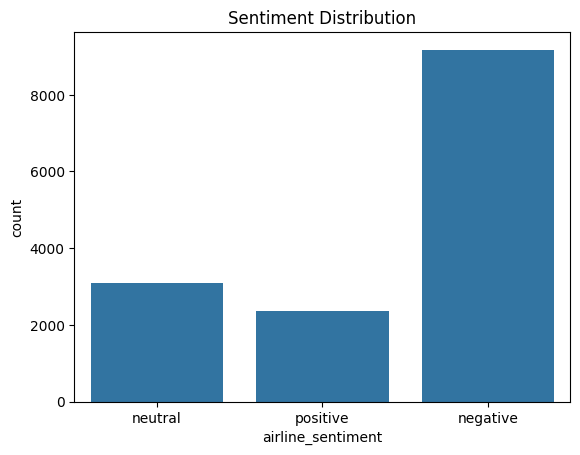

In [4]:
# Visualize sentiment distribution
sns.countplot(x='airline_sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()


In [5]:
# Clean the text
df['text'] = df['text'].str.lower()
df['text'] = df['text'].str.replace(r"http\S+", "", regex=True)
df['text'] = df['text'].str.replace(r"[^a-zA-Z ]", "", regex=True)

# Train-test split
X = df['text']
y = df['airline_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Vectorize using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [7]:
# Train model
model = LogisticRegression(random_state=42)
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)


In [8]:
# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7995218579234973

Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.94      0.88      1889
     neutral       0.66      0.49      0.56       580
    positive       0.79      0.63      0.70       459

    accuracy                           0.80      2928
   macro avg       0.76      0.69      0.71      2928
weighted avg       0.79      0.80      0.79      2928


Confusion Matrix:
 [[1768   85   36]
 [ 255  283   42]
 [ 111   58  290]]


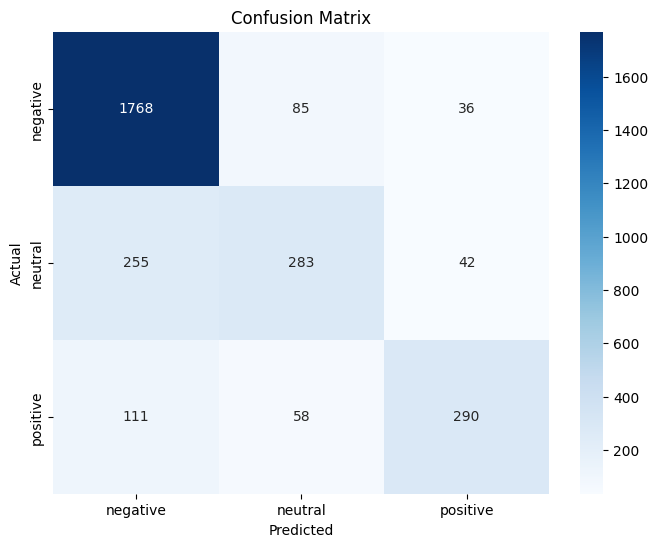

Predicted sentiment for 'I had a great experience with the airline!': positive
Predicted sentiment for 'The flight was delayed and the service was terrible.': negative


In [9]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Save the model and vectorizer
import joblib
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
# Load the model and vectorizer for future use
model = joblib.load('sentiment_model.pkl')
tfidf = joblib.load('tfidf_vectorizer.pkl')
# Example usage
def predict_sentiment(text):
    text_cleaned = text.lower()
    text_cleaned = tfidf.transform([text_cleaned])
    prediction = model.predict(text_cleaned)
    return prediction[0]
# Example prediction
example_text = "I had a great experience with the airline!"
predicted_sentiment = predict_sentiment(example_text)
print(f"Predicted sentiment for '{example_text}': {predicted_sentiment}")
# Define a constant for the repeated example text
DELAYED_FLIGHT_TEXT = "The flight was delayed and the service was terrible."

# Example usage of the predict_sentiment function
predicted_sentiment = predict_sentiment(DELAYED_FLIGHT_TEXT)
print(f"Predicted sentiment for '{DELAYED_FLIGHT_TEXT}': {predicted_sentiment}")